In [4]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('../data/raw/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### **__Missing Values__**

In [11]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

#### **__Data Duplicated__**

In [8]:
df.duplicated().sum()


np.int64(0)

#### **__Feature Selection__**

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

In [18]:
Non_Feature_Columns = [
    'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 
    'GarageQual', 'GarageFinish', 'GarageType'
]

In [20]:
for col in Non_Feature_Columns:
    if col in df.columns:
        df[col] = df[col].fillna('None')

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [22]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [25]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

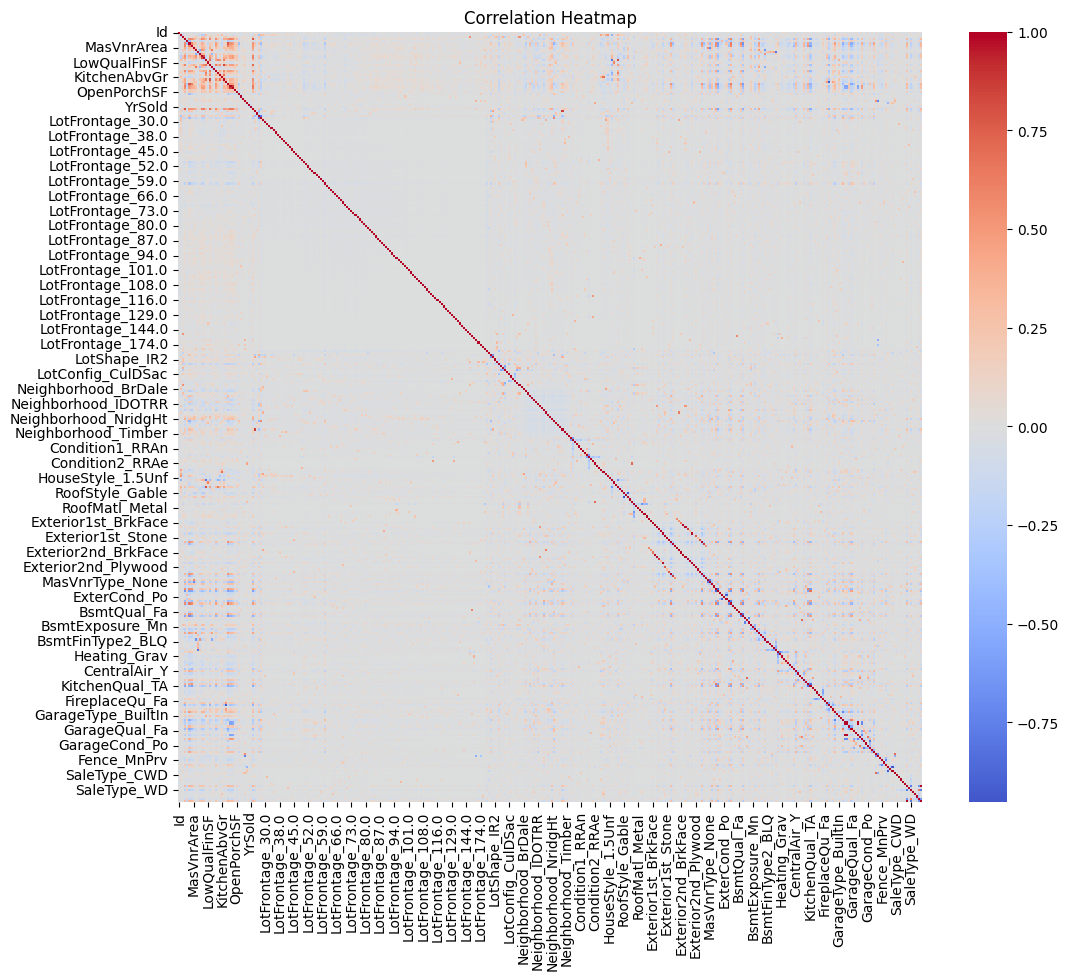

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
if 'SalePrice' in df_encoded.columns:
    corr_target = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
    print("Top correlated features with SalePrice:")
    display(corr_target.head(15))

Top correlated features with SalePrice:


SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
Foundation_PConc    0.497734
MasVnrArea          0.472614
Fireplaces          0.466929
GarageYrBlt         0.466754
Name: SalePrice, dtype: float64